# Comparison of scenarios

In [1]:
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx
from ItalySetup import ItalySetup
from covidOCP import COVIDVaccinationOCP, COVIDParametersOCP
from main import pick_scenario, build_scenario
import seaborn as sns
import datetime
import pickle
import os

nx = 9
states_names = ['S', 'E', 'P', 'I', 'A', 'Q', 'H', 'R', 'V']
when = 'future'
file_prefix = f'week'
outdir = '2021-01-19-107_90/'

n_int_steps = 6
nnodes = 107  # nodes
ndays_ocp = 90
ndays = 90

setup = ItalySetup(nnodes, ndays, when)
setup_ocp = ItalySetup(nnodes, ndays_ocp, when)
M = setup.nnodes
N = len(setup.model_days) - 1

with open(f'italy-data/parameters_{nnodes}_{when}.pkl', 'rb') as inp:
    p = pickle.load(inp)
    
scenarios = {pick_scenario(setup, i)['name']:pick_scenario(setup, i) for i in np.arange(16)}
scenarios.keys()

Loaded Italy Setup with 107 nodes.
Loaded Italy Setup with 107 nodes.


dict_keys(['U-r3-t479700-id0', 'L-r3-t479700-id1', 'U-r15-t125000-id2', 'L-r15-t125000-id3', 'U-r15-t250000-id4', 'L-r15-t250000-id5', 'U-r15-t479700-id6', 'L-r15-t479700-id7', 'U-r15-t1000000-id8', 'L-r15-t1000000-id9', 'U-r15-t1500000-id10', 'L-r15-t1500000-id11', 'U-r15-t2000000-id12', 'L-r15-t2000000-id13', 'U-r150-t479700-id14', 'L-r150-t479700-id15'])

In [22]:
summary = pd.read_csv('model_output/2021-02-19/all_summary.csv', index_col=0)
summary['method_str'] = summary['method']
summary['method'].replace('opi', 'Optimal', inplace=True)
summary['method'].replace('pinc', 'Incidence', inplace=True)
#summary.replace('cas', 'Future Incidence', inplace=True)
summary['method'].replace('ppop', 'Population', inplace=True)
summary['method'].replace('psus', 'Susceptibility', inplace=True)
summary.replace('U', 'Pessimistic', inplace=True)
summary.replace('L', 'Optimistic', inplace=True)

In [23]:
summary

,newdoseperweek,method,infected,post_sample,doses,scenario-beta,scenario-rate,scenario-tot,scenario,bl,averted,avertedpervacc,method_str
0,479700,Optimal,2.698752e+08,0.0,6.318990e+06,Pessimistic,r3,t479700,U-r3-t479700-id0,2.775619e+08,7.686652e+06,1.216437,opi
1,479700,Optimal,2.622298e+08,1.0,6.318990e+06,Pessimistic,r3,t479700,U-r3-t479700-id0,2.693437e+08,7.113914e+06,1.125799,opi
2,479700,Optimal,2.501296e+08,2.0,6.318990e+06,Pessimistic,r3,t479700,U-r3-t479700-id0,2.567787e+08,6.649067e+06,1.052236,opi
3,479700,Optimal,2.545047e+08,3.0,6.318990e+06,Pessimistic,r3,t479700,U-r3-t479700-id0,2.613690e+08,6.864316e+06,1.086300,opi
4,479700,Optimal,2.422173e+08,4.0,6.318990e+06,Pessimistic,r3,t479700,U-r3-t479700-id0,2.488610e+08,6.643782e+06,1.051399,opi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,479700,fpop,8.559696e+07,97.0,6.236100e+06,Optimistic,r150,t479700,L-r150-t479700-id15,8.723504e+07,1.638081e+06,0.262677,fpop
98,479700,fpop,8.998865e+07,98.0,6.236100e+06,Optimistic,r150,t479700,L-r150-t479700-id15,9.229156e+07,2.302911e+06,0.369287,fpop
99,479700,fpop,9.195135e+07,99.0,6.236100e+06,Optimistic,r150,t479700,L-r150-t479700-id15,9.365158e+07,1.700232e+06,0.272643,fpop
100,479700,fpop,8.636084e+07,100.0,6.236100e+06,Optimistic,r150,t479700,L-r150-t479700-id15,8.819749e+07,1.836645e+06,0.294518,fpop


In [6]:
summary['newdoseperweek'].unique()

array([ 479700,  125000,  250000, 1000000, 1500000, 2000000])

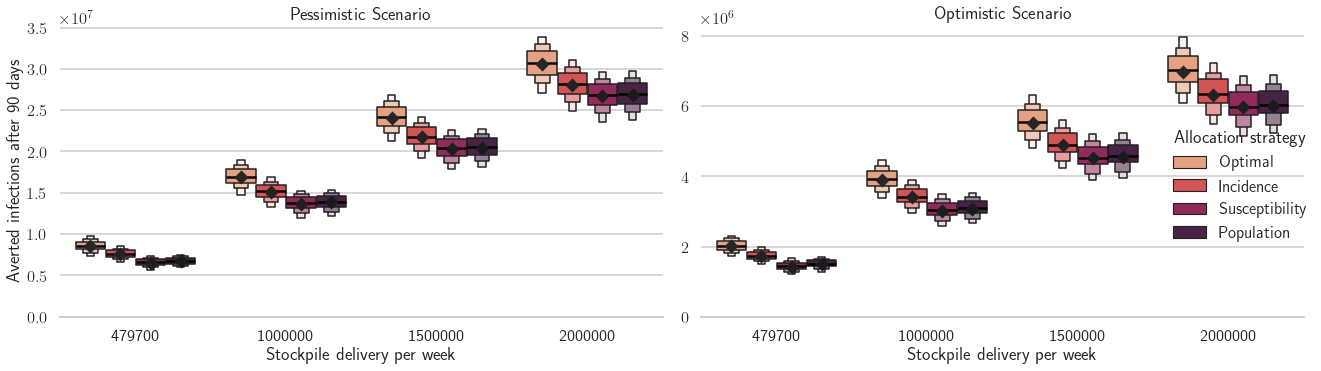

In [33]:
methods = ['opi', 'finc', 'pinc', 'fsus', 'psus','fincpp', 'pincpp', 'fsuspp', 'psuspp', 'ppop', 'fpop']
#methods = ['opi', 'finc','fincpp', 'pincpp']
methods = ['opi', 'pinc','ppop', 'psus']

toplot = "averted"
#var_x = "scenario-rate"  
var_x = "newdoseperweek" 

dpw = summary['newdoseperweek'].unique()

dpw = [ 479700, 1000000, 1500000, 2000000]

#smry = summary[(summary['scenario-tot']=='t479700') & (summary['method'].isin(methods))]


smry = summary[(summary['scenario-rate']=='r15') & (summary['method_str'].isin(methods)) & (summary['newdoseperweek'].isin(dpw))]
sns.set_theme(style="whitegrid")
sns.set_context("talk")
mpl.rc('text', usetex=True)
#mpl.rc('font', size=25)
#mpl.rc('legend', fontsize=24)


grid = sns.FacetGrid(smry, col="scenario-beta",  palette="mako", height=5.5, aspect = 1.5, col_wrap=2, sharey=False,sharex=True)
def quantile_plot(index, reduction, method, scn_beta, **kwargs):

    g = sns.boxenplot(
            #data=smry,,
            x=index, y=reduction,
            hue=method,
            palette="rocket_r",
            dodge=9,
            #size=2,
            #alpha = .4,
            #inner="stick"
            showfliers=False,
        
        )
    ax = plt.gca()
    ax.set_ylim(0)
    plt.setp(ax.lines, zorder=100)
    plt.setp(ax.collections, zorder=100, label="")
    plt.legend()
    
    for line in ax.get_lines():
        line.set_color('black')
        line.set_linewidth(2.5)
        line.set_alpha(10)
    



# Draw a line plot to show the trajectory of each random walk
#grid.map(sns.violinplot, 'index', "reduction" )#, marker="o")
grid.map(quantile_plot, var_x, toplot, "method", "scenario-beta")#, marker="o")

grid.add_legend(title='Allocation strategy')


def quantile_plot(index, reduction, method, scn_beta, **kwargs):
    g2 = sns.stripplot(
        x=var_x,
        y=toplot,
        data = smry[(smry['post_sample']==101) & (smry['scenario-beta']==scn_beta.unique()[0])], 
        dodge=.63, 
        hue="method",
        jitter=False,
        #ax = ax,
       color = 'k',
        #palette="husl",
        marker="D",   # passed to https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter
        s=10, 
        linewidths = 10,
        edgecolors = 'k',
        zorder=100000,
    )
grid.map(quantile_plot, "newdoseperweek", toplot, "method", "scenario-beta")#, marker="o")


for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        
# Adjust the arrangement of the plots
#grid.fig.suptitle(run_name)
grid.despine(left=True)

grid.set_axis_labels("Stockpile delivery per week","Averted infections after 90 days",)
grid.set_titles(col_template="{col_name} Scenario", row_template="{row_name}")
grid.fig.tight_layout(w_pad=1)
grid.fig.savefig(f'figures/scenarios_perturb_all.pdf')

In [46]:
filename = 'model_output/scenarios_102_90/L-r15-t479700-id7-opi-107_90.csv'
#filename = 'helvetios-runs/2021-02-15-107_90/week-L-r150-t479700-id11-opt-107_90.csv'
mydata = pd.read_csv(filename, index_col= 'date', parse_dates=True)
maxvaccrate_regional, stockpile_national, stockpile_national_constraint, control_initial = build_scenario(setup, pick_scenario(setup, int(filename.split('-')[-3][2:])))
mydata[mydata['comp']=='yell'].sum()['value']

245109.2340726376

In [47]:
filename = 'model_output/scenarios_102_90/L-r15-t479700-id7-fincpp-107_90.csv'
mydata = pd.read_csv(filename, index_col= 'date', parse_dates=True)
maxvaccrate_regional, stockpile_national, stockpile_national_constraint, control_initial = build_scenario(setup, pick_scenario(setup, int(filename.split('-')[-3][2:])))
mydata[mydata['comp']=='yell'].sum()['value']

254720.32989864826

In [16]:
summary[(summary['post_sample']==101) & (summary['scenario-rate']=='r15') & (summary['newdoseperweek']==479700) & (summary['scenario-beta']=='Optimistic')].sort_values('averted', ascending=False)


,newdoseperweek,method,infected,post_sample,doses,scenario-beta,scenario-rate,scenario-tot,scenario,bl,averted,avertedpervacc
101,479700,opi,8.616819e+07,101.0,6.236100e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,2.010679e+06,0.322426
101,479700,pinc,8.644766e+07,101.0,6.238414e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.731203e+06,0.277507
101,479700,pincpp,8.645119e+07,101.0,6.239378e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.727672e+06,0.276898
101,479700,fincpp,8.664006e+07,101.0,6.236100e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.538807e+06,0.246758
101,479700,finc,8.664182e+07,101.0,6.236100e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.537047e+06,0.246476
101,479700,ppop,8.668635e+07,101.0,6.238393e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.492516e+06,0.239247
101,479700,fpop,8.668716e+07,101.0,6.236100e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.491708e+06,0.239205
101,479700,fsus,8.669935e+07,101.0,6.236100e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.479510e+06,0.237249
101,479700,fsuspp,8.671517e+07,101.0,6.236100e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.463693e+06,0.234713
101,479700,psus,8.675124e+07,101.0,6.238393e+06,Optimistic,r15,t479700,L-r15-t479700-id7,8.817886e+07,1.427623e+06,0.228845


In [ ]:
smry = summary[(summary['scenario-rate']=='r15')]

grid = sns.FacetGrid(smry, col="scenario-beta",  palette="mako", height=8.5, aspect = 1.5, col_wrap=2, sharey=False,sharex=True)
def quantile_plot(index, reduction, method, scn_beta, **kwargs):
    g = sns.boxenplot(
        #data=smry,,
        x=index, y=reduction,
        hue=method,
        palette="husl",
        dodge=9,
        #size=2,
        #alpha = .4,
        #inner="stick"
        showfliers=False
    )
    ax = plt.gca()
    ax.set_ylim(0)
    g.legend(True)

    g2 = sns.pointplot(x="newdoseperweek", y="avertedpervacc",
          data = smry[(smry['post_sample']==64) & (smry['scenario-beta']==scn_beta.unique()[0])], 
          dodge=.60, 
          join=False, 
          #palette="cool",
          hue="method",
          #palette="husl",
                       color = 'black',
          markers="D", 
          scale=1, 
          ci=None,
          zorder=100000,
                       edgecolor='black',
                       hatch = "|",
                        linewidth=3,
                       markeredgewidth=4, #markeredgecolor=(1, 1, 1, 0)
          #legend=True
         )
    
    #sns.violinplot(x=index, y=reduction, #hue="geoid",
    #               dodge=True,  zorder=1)#Ç, scale='width')#, alpha=.25,capsize=.8, size = .2, errwidth=.75);
    #sns.pointplot(x="index", y="reduction", data = npi_truth[npi_truth['geoid']==kwargs['label']], dodge=.532, join=False, #palette="dark",
    #          markers="d", scale=1.75, ci=None,zorder=102, color="black")
    #plt.scatter((1,1),  **kwargs)

# Draw a line plot to show the trajectory of each random walk
#grid.map(sns.violinplot, 'index', "reduction" )#, marker="o")
grid.map(quantile_plot, "newdoseperweek", "avertedpervacc", "method", "scenario-beta")#, marker="o")


for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(0)
        
# Adjust the arrangement of the plots
#grid.fig.suptitle(run_name)
grid.despine(left=True)

grid.set_axis_labels("Averted infection per dose", "New doses available, per week")
grid.set_titles(col_template="Scenario: {col_name}", row_template="{row_name}")
#grid.add_legend()
grid.fig.tight_layout(w_pad=1)
grid.fig.savefig(f'figures/scenarios_perturb_all.pdf')

In [61]:
smry[smry['avertedpervacc'] < 0]

,newdoseperweek,method,infected,post_sample,doses,scenario-beta,scenario-rate,scenario-tot,scenario,bl,averted,avertedpervacc


In [213]:
sn

NameError: name 'sn' is not defined

In [23]:
scn = 'L'
smry = summary[(summary['scenario-rate']=='r15') & (summary['scenario-beta']==scn)]

sns.set(rc={'figure.figsize':(10,5), 'figure.dpi':100})
sns.set_theme(style="whitegrid")
sns.set_context("talk")

g = sns.catplot(
    data=smry,
    kind="boxen",
    x="newdoseperweek",
    y="avertedpervacc", 
    hue="method",
    palette="rocket",
    dodge=.59,
    height=8,
    #alpha = .4,
    #inner="stick"
    legend=False,
    showfliers=False
)
g2 = sns.pointplot(x="newdoseperweek",
              y="avertedpervacc", 
              data = smry[smry['post_sample']==64], 
              dodge=.59, 
              join=False, 
              #palette="cool",
              hue="method",
              palette="mako_r",
              markers="d", 
              scale=1.25, 
              ci=None,
              zorder=100000,
              #legend=False
             )

plt.setp(g.ax.lines, zorder=100)
plt.setp(g.ax.collections, zorder=100, label="")
g.despine(left=True)
g.set_axis_labels("Dose per week", "Averted Cases per dose")
#g2.legend.set_title("Allocation")


g.fig.savefig(f'figures/scenarios_perturb{scn}.pdf')

,newdoseperweek,method,infected,post_sample,doses,scenario-beta,scenario-rate,scenario-tot,scenario,bl,averted,avertedpervacc
64,125000,opi,9.801593e+08,64.0,1.625000e+06,U,r15,t125000,U-r15-t125000-id4,1.013345e+09,3.318549e+07,20.421839
64,250000,opi,9.527705e+08,64.0,3.250000e+06,U,r15,t250000,U-r15-t250000-id10,1.013345e+09,6.057431e+07,18.638251
64,479700,opi,9.106863e+08,64.0,6.236100e+06,U,r15,t479700,U-r15-t479700-id16,1.013345e+09,1.026585e+08,16.461971
64,1000000,opi,8.382537e+08,64.0,1.297121e+07,U,r15,t1000000,U-r15-t1000000-id22,1.013345e+09,1.750910e+08,13.498432
64,2000000,opi,7.420616e+08,64.0,2.491384e+07,U,r15,t2000000,U-r15-t2000000-id28,1.013345e+09,2.712832e+08,10.888853
64,125000,cas,9.926378e+08,64.0,1.608347e+06,U,r15,t125000,U-r15-t125000-id4,1.013345e+09,2.070701e+07,12.874710
64,250000,cas,9.719664e+08,64.0,3.216392e+06,U,r15,t250000,U-r15-t250000-id10,1.013345e+09,4.137836e+07,12.864836
64,479700,cas,9.367470e+08,64.0,6.159978e+06,U,r15,t479700,U-r15-t479700-id16,1.013345e+09,7.659775e+07,12.434743
64,1000000,cas,8.678225e+08,64.0,1.267881e+07,U,r15,t1000000,U-r15-t1000000-id22,1.013345e+09,1.455223e+08,11.477598
64,2000000,cas,7.611833e+08,64.0,2.486851e+07,U,r15,t2000000,U-r15-t2000000-id28,1.013345e+09,2.521615e+08,10.139789
